Exploratory data analysis по датасету [Mobile Price Classification](https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification) с kaggle. Это не соревнование и итоговые результаты классификатора на test данных получить нельзя.

# Load and inspect missing data

In [1]:
%%capture
%pip install opendatasets
%pip install -U scikit-learn
%pip install seaborn

In [2]:
import pandas as pd
import opendatasets as od

In [3]:
dataset_link = "https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification"

od.download(dataset_link)
raw_train = pd.read_csv("./mobile-price-classification/train.csv")

Skipping, found downloaded files in "./mobile-price-classification" (use force=True to force download)


In [4]:
raw_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [5]:
raw_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

Прелесть, все данные есть

In [6]:
raw_train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


# Визуализация

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

Сразу посмотрим корреляции, ибо все данные численные

<Axes: >

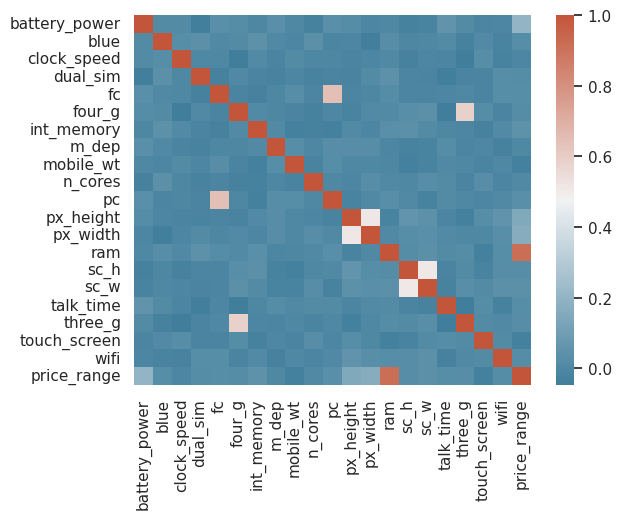

In [8]:
sns.heatmap(data=raw_train.corr(),
            cmap=sns.diverging_palette(230, 20, as_cmap=True))

Поищем выбросы

<Axes: >

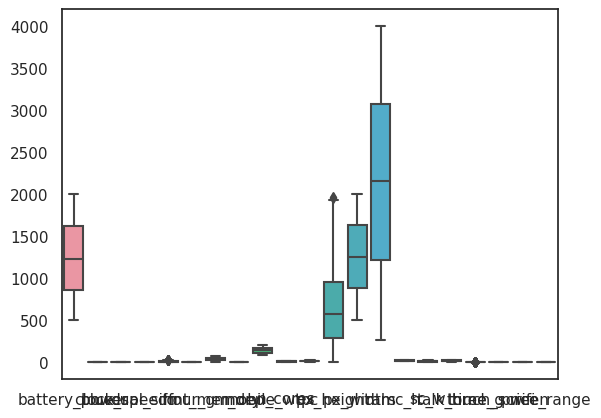

In [9]:
sns.boxplot(data=raw_train)

Прокинем все через standartscaler, чтобы все красиво на одном графике посмотреть на выбросы

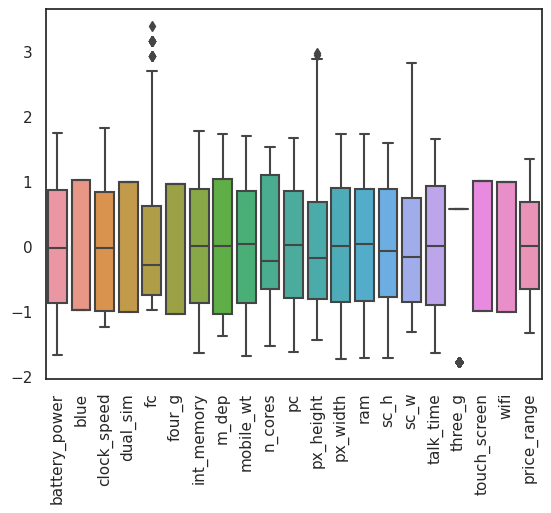

In [10]:
from sklearn.preprocessing import StandardScaler

Sscale = StandardScaler()

transformed_data = pd.DataFrame(Sscale.fit_transform(raw_train))
transformed_data.columns = raw_train.columns

ax = sns.boxplot(data=transformed_data)

_ = ax.set_xticklabels(ax.get_xticklabels(),rotation=90) # _ чтобы не отображался вывод от .set_xticklabels

Выбросы на fc, px_height и что-то странное в three_g колонке

Посмотрим на них по-ближе, может это просто standartscaler + boxplot так выглядят

<Axes: title={'center': 'Has 3G or not'}, xlabel='three_g', ylabel='Count'>

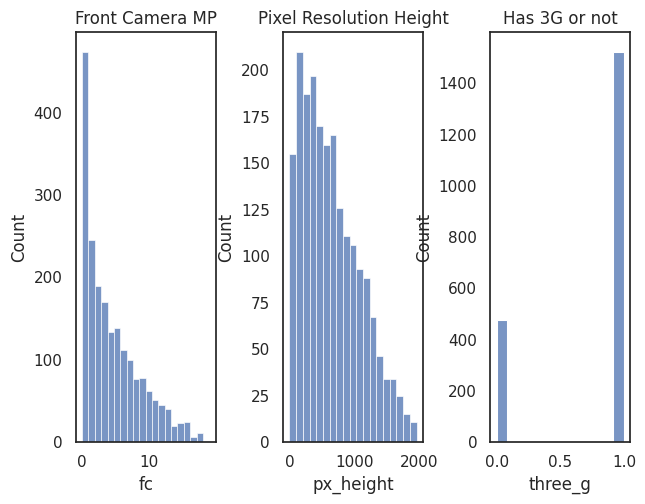

In [11]:
fig, axes = plt.subplots(ncols=3)

plt.tight_layout()

axes[0].set_title("Front Camera MP")
axes[1].set_title("Pixel Resolution Height")
axes[2].set_title("Has 3G or not")

sns.histplot(data=raw_train["fc"], ax=axes[0])
sns.histplot(data=raw_train["px_height"], ax=axes[1])
sns.histplot(data=raw_train["three_g"], ax=axes[2])

Первые два похожи на пуассоновские распределения, а третье просто странно выглядело на boxplot'е. Все данные удивительно чистые, даже никаких долгих trailing edge.

# Настало время классификаторов

Еще раз посмотрим на данные, численную стабильность и прочее

In [12]:
raw_train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [13]:
raw_train.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

У нас есть количественные и качественные колонки. Их, очевидно, в scaler не надо подавать. Напишем свой Scaler, который отфильтрует качественные данные и не будет их преобразовывать

In [14]:
from sklearn.base import TransformerMixin
from sklearn.exceptions import NotFittedError

class MyScaler(TransformerMixin):
    def __init__(self, categ_threshlohd=4, scaler=StandardScaler, **kwargs):
        self.scaler = scaler(**kwargs)
        self.categ_threshlohd = categ_threshlohd

    def fit(self, X):
        quant = X.loc[:, X.nunique() > self.categ_threshlohd]
        return self.scaler.fit(quant)

    def fit_transform(self, X):
        quant, categ = X.loc[:, X.nunique() > self.categ_threshlohd],\
                       X.loc[:, X.nunique() <= self.categ_threshlohd]
        scaled_part = pd.DataFrame(self.scaler.fit_transform(quant))
        scaled_part.columns = quant.columns
        return scaled_part.join(categ)
    
    def transform(self, X):
        if not hasattr(self.scaler, "n_features_in_"):
            raise NotFittedError("This scaler instance is not fitted yet. Call 'fit' with\
                                 appropriate arguments before using this scaler")

        quant, categ = X.loc[:, X.nunique() > self.categ_threshlohd],\
                       X.loc[:, X.nunique() <= self.categ_threshlohd]
        scaled_part = pd.DataFrame(self.scaler.transform(quant))
        scaled_part.columns = quant.columns
        return scaled_part.join(categ)

In [15]:
test_transformer = MyScaler()

pd.DataFrame(test_transformer.fit_transform(raw_train)).head(5)

# вообще это умеет делать и sklearn, но я уже сделал и оставлю тут. Далее использую ColumnTransformer

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,...,sc_h,sc_w,talk_time,blue,dual_sim,four_g,three_g,touch_screen,wifi,price_range
0,-0.902597,0.830779,-0.762495,-1.380644,0.340740,1.349249,-1.101971,-1.305750,-1.408949,-1.146784,...,-0.784983,0.283103,1.462493,0,0,0,0,0,1,1
1,-0.495139,-1.253064,-0.992890,1.155024,0.687548,-0.120059,-0.664768,-0.645989,0.585778,1.704465,...,1.114266,-0.635317,-0.734267,1,1,1,1,1,0,2
2,-1.537686,-1.253064,-0.532099,0.493546,1.381165,0.134244,0.209639,-0.645989,1.392684,1.074968,...,-0.310171,-0.864922,-0.368140,1,1,1,1,1,0,2
3,-1.419319,1.198517,-0.992890,-1.215274,1.034357,-0.261339,0.646842,-0.151168,1.286750,1.236971,...,0.876859,0.512708,-0.002014,1,0,0,1,0,0,2
4,1.325906,-0.395011,2.002254,0.658915,0.340740,0.021220,-1.101971,0.673534,1.268718,-0.091452,...,-1.022389,-0.864922,0.730240,1,0,1,1,1,0,1


База готова, попробуем gridsearch на всяких разных классификаторах и скейлерах

Подготовим данные для тренировки

In [16]:
X, y = raw_train.drop("price_range", axis=1), raw_train["price_range"]

In [17]:
from sklearn.compose import ColumnTransformer

transformer=ColumnTransformer(transformers=[
    ('num',StandardScaler(), X.loc[:, X.nunique() > 4].columns)
],remainder='passthrough')

pd.DataFrame(transformer.fit_transform(X)).head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.902597,0.830779,-0.762495,-1.380644,0.340740,1.349249,-1.101971,-1.305750,-1.408949,-1.146784,0.391703,-0.784983,0.283103,1.462493,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.495139,-1.253064,-0.992890,1.155024,0.687548,-0.120059,-0.664768,-0.645989,0.585778,1.704465,0.467317,1.114266,-0.635317,-0.734267,1.0,1.0,1.0,1.0,1.0,0.0
2,-1.537686,-1.253064,-0.532099,0.493546,1.381165,0.134244,0.209639,-0.645989,1.392684,1.074968,0.441498,-0.310171,-0.864922,-0.368140,1.0,1.0,1.0,1.0,1.0,0.0
3,-1.419319,1.198517,-0.992890,-1.215274,1.034357,-0.261339,0.646842,-0.151168,1.286750,1.236971,0.594569,0.876859,0.512708,-0.002014,1.0,0.0,0.0,1.0,0.0,0.0
4,1.325906,-0.395011,2.002254,0.658915,0.340740,0.021220,-1.101971,0.673534,1.268718,-0.091452,-0.657666,-1.022389,-0.864922,0.730240,1.0,0.0,1.0,1.0,1.0,0.0


In [18]:
from sklearn.preprocessing import StandardScaler, QuantileTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import HistGradientBoostingClassifier, RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from itertools import product

from collections import defaultdict

models = [
    SVC,
    LinearSVC,
    KNeighborsClassifier,
    HistGradientBoostingClassifier,
    RandomForestClassifier
]

scalers = [
    StandardScaler,
    QuantileTransformer
]

model_params = {
    SVC: {
        'C':[1,10,100,1000],
        'gamma':[1,0.1,0.001,0.0001],
        'kernel':['linear','rbf']},
    KNeighborsClassifier: {
        "n_neighbors": [3, 4, 5, 6, 7, 10],
        "algorithm": ['ball_tree', 'kd_tree', 'auto']
    },
    HistGradientBoostingClassifier: {},
    LinearSVC: {
        'C':[1,10,100,1000],
        "loss": ["hinge", "squared_hinge"]
    },
    RandomForestClassifier: {}
}

simplescore, piped_model, reports = defaultdict(dict),  defaultdict(dict),  defaultdict(dict)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

for _model, _scaler in product(models, scalers):


    transformer=ColumnTransformer(
        transformers=[
            (
                'num',
                _scaler(),
                X.loc[:, X.nunique() > 4].columns
                )
            ],
        remainder='passthrough')


    pipe = make_pipeline(
        transformer,
        GridSearchCV(
            _model(),
            param_grid= model_params[_model],
            scoring="f1_micro",
            cv=3,
            refit=True,
            n_jobs=-1
            )
    )



    pipe.fit(X_train, y_train)


    reports[_model.__name__][_scaler.__name__] = classification_report(y_test, pipe.predict(X_test))
    piped_model[_model.__name__][_scaler.__name__] = pipe
    simplescore[_model.__name__][_scaler.__name__] = pipe.score(X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [19]:
pd.DataFrame(simplescore)

,SVC,LinearSVC,KNeighborsClassifier,HistGradientBoostingClassifier,RandomForestClassifier
StandardScaler,0.962,0.872,0.574,0.912,0.876
QuantileTransformer,0.950,0.868,0.402,0.912,0.890


Посмотрим тогда ее classification_report

In [20]:
print(reports['SVC']["StandardScaler"])

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       124
           1       0.94      0.96      0.95       110
           2       0.95      0.94      0.94       125
           3       0.97      0.97      0.97       141

    accuracy                           0.96       500
   macro avg       0.96      0.96      0.96       500
weighted avg       0.96      0.96      0.96       500



Все прилично, никакого перевеса в стороны precision/recall
Экспортируем данные модели, соберем ее в самом быстром виде и прогоним на test данных

In [21]:
chosen_model = piped_model['SVC']["StandardScaler"]
chosen_model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  Index(['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep',
       'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h',
       'sc_w', 'talk_time'],
      dtype='object'))])),
                ('gridsearchcv',
                 GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
                              param_grid={'C': [1, 10, 100, 1000],
                                          'gamma': [1, 0.1, 0.001, 0.0001],
                                          'kernel': ['linear', 'rbf']},
                              scoring='f1_micro'))])

In [22]:
final_params = chosen_model[1].best_params_

# Sumbission

In [23]:
test = pd.read_csv("./mobile-price-classification/test.csv", index_col=0)

pipe = Pipeline([
    ("scale", transformer),
    ("model", SVC())
])

formatted_params = {f"model__{key}": value for key, value in final_params.items()}

pipe.set_params(**formatted_params)

pipe.fit(X, y)
pred = pipe.predict(test)

pred.tofile('data2.csv', sep = ',')

In [24]:
pred

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 2, 1, 3,
       1, 1, 3, 0, 2, 0, 3, 0, 2, 0, 3, 0, 1, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 3, 0, 3, 1, 3, 1, 1, 3, 3, 3, 0, 1, 0, 1,
       1, 3, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 2, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 2, 2, 0, 2, 2, 1, 2, 1, 2, 1, 0, 0, 3, 0, 2, 1, 1, 2, 3,
       3, 3, 1, 3, 3, 3, 3, 2, 3, 0, 0, 3, 2, 1, 2, 0, 3, 2, 2, 1, 0, 2,
       2, 1, 3, 1, 1, 0, 3, 2, 1, 2, 1, 2, 2, 3, 3, 3, 2, 3, 2, 3, 1, 0,
       3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 2, 1, 0, 1,
       0, 0, 1, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 0, 1, 0, 3, 1, 0, 2, 2,
       2, 3, 1, 1, 2, 2, 3, 2, 2, 1, 0, 0, 1, 3, 0, 2, 2, 3, 0, 2, 0, 3,
       2, 3, 3, 1, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 3, 1, 3, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 3, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 1, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 0, 2, 3, 1, 1, 3, 2, 1, 3, 0, 0, 3, 1, 0, 3, 2, 3,
       3, 2, 1, 3, 3, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1,